# Data set: 551_Mixed1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

## Load data

In [21]:
df = pd.read_csv('../data_set/data_set_modificado/551_Mixed1.csv', parse_dates=['Time Stamp'])
df.head()

Time Stamp  Step Status     Prog Time     Step Time  Cycle  \
0 2018-10-29 14:41:07    53  TABLE  27:38:02.302  00:00:01.446      1   
1 2018-10-29 14:41:07    53  TABLE  27:38:02.402  00:00:01.546      1   
2 2018-10-29 14:41:07    53  TABLE  27:38:02.503  00:00:01.647      1   
3 2018-10-29 14:41:07    53  TABLE  27:38:02.603  00:00:01.747      1   
4 2018-10-29 14:41:08    53  TABLE  27:38:02.704  00:00:01.848      1   

   Cycle Level       Procedure  Voltage  Current  Temperature  Capacity  \
0            1  LG_HG2_CyclesA  4.18464 -0.05108     23.97615  -0.00000   
1            1  LG_HG2_CyclesA  4.18396 -0.07918     23.97615  -0.00000   
2            1  LG_HG2_CyclesA  4.18363 -0.08939     23.97615  -0.00001   
3            1  LG_HG2_CyclesA  4.18363 -0.09195     23.97615  -0.00001   
4            1  LG_HG2_CyclesA  4.18346 -0.09195     23.97615  -0.00001   

    WhAccu  Cnt  
0 -0.00000  7.0  
1 -0.00001  7.0  
2 -0.00002  7.0  
3 -0.00003  7.0  
4 -0.00004  7.0

## Time-step features

### Time dummy

In [22]:
df['Time'] = np.arange(len(df.index))

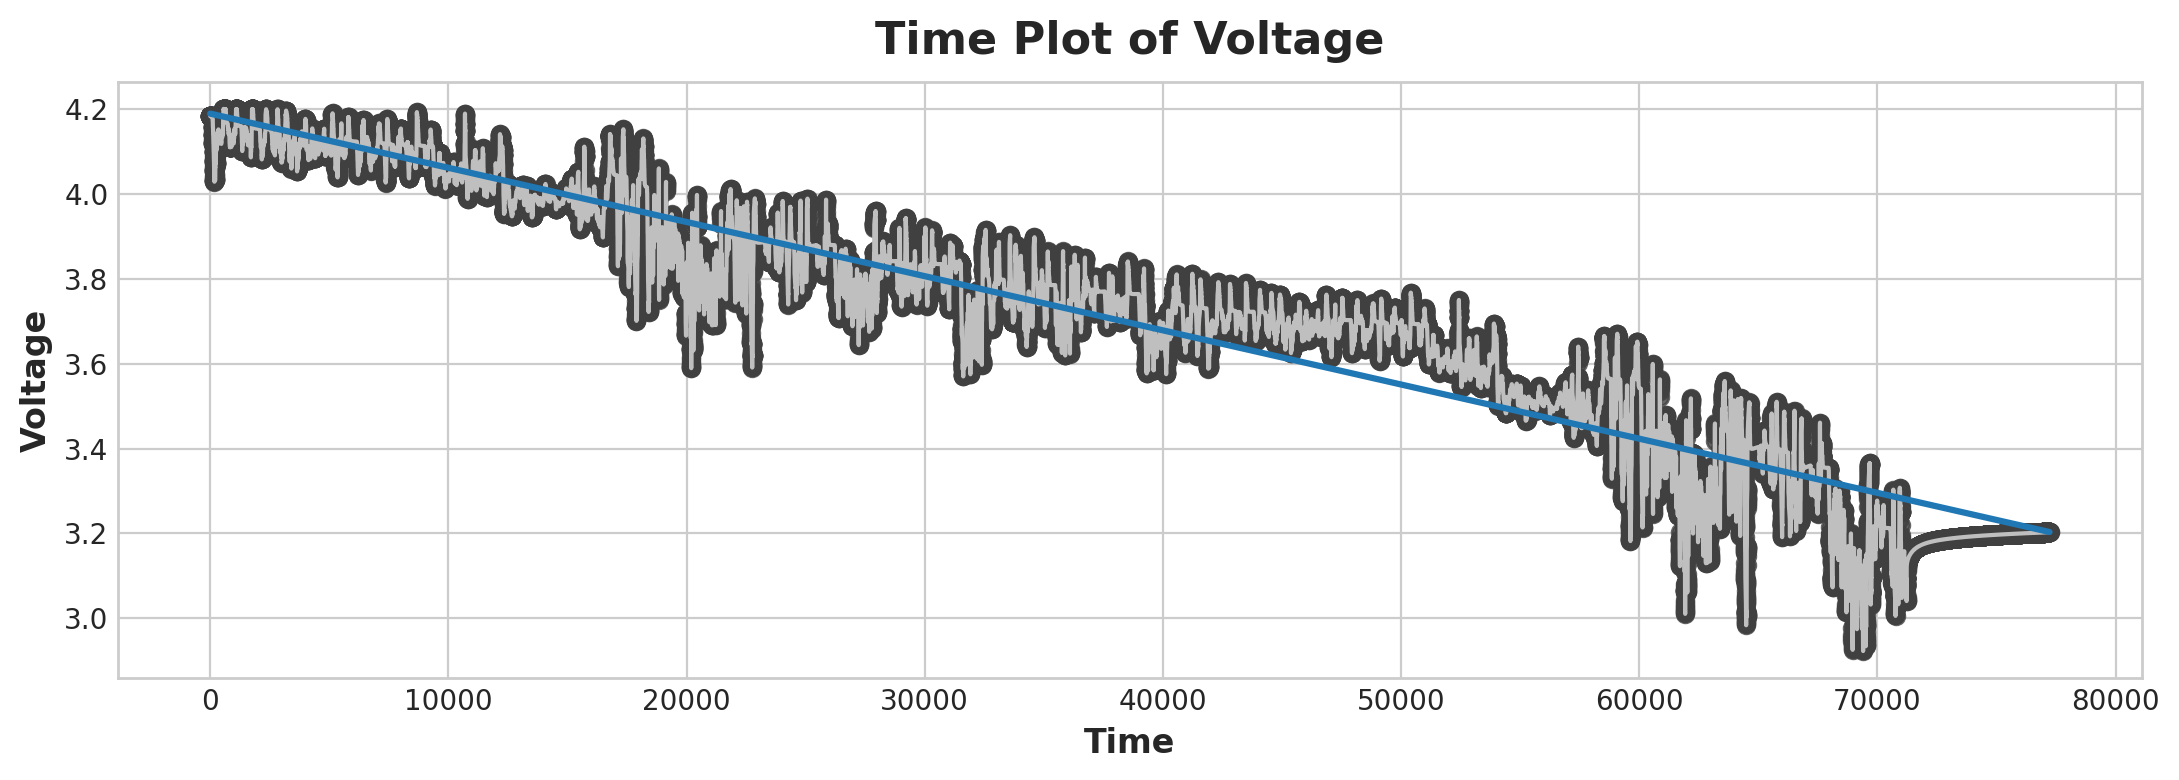

In [23]:
fig, ax = plt.subplots()
ax.plot('Time', 'Voltage', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Voltage', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Voltage');

## Lag features

In [24]:
df['Lag_1'] = df['Voltage'].shift(1)
df = df.reindex(columns=['Voltage', 'Lag_1'])

df.head()

Voltage    Lag_1
0  4.18464      NaN
1  4.18396  4.18464
2  4.18363  4.18396
3  4.18363  4.18363
4  4.18346  4.18363

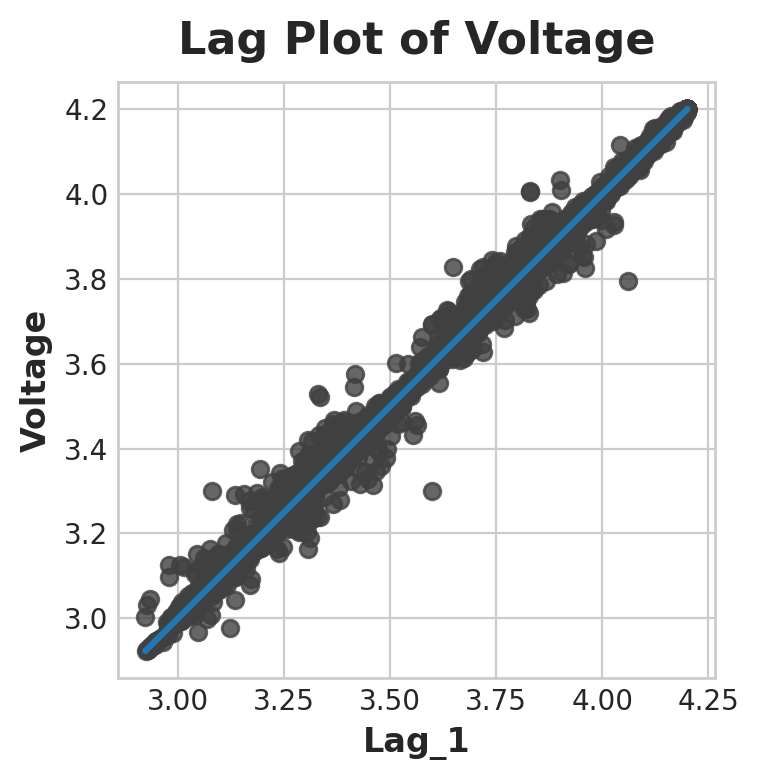

In [25]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Voltage', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Voltage');

#Comentario